<a href="https://colab.research.google.com/github/FathimaMubeena/MLClassification_WineQuality/blob/main/src/python/train/MLClassification_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## wine Quality dataset:
The Data
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]

The Wine Quality dataset contains information about various physicochemical properties of wines. The entire dataset is grouped into two categories: red wine and white wine. Each wine has a quality label associated with it. The label is in the range of 0 to 10.

## The Goal

The goal is find out the best Quality of wine.

## Import libraries

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Data Ingestion / Extraction
Loading the data
We begin by loading our data, which is stored in the CSV format.

In [89]:
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)

data_directory = "/content/Drive/MyDrive/MachineLearning/wine_quality"

Mounted at /content/Drive


In [90]:
!ls /content/Drive/MyDrive/MachineLearning/wine_quality

wine_quality.ipynb  winequality-red.csv  winequality-white.csv	wine+quality.zip


In [91]:
df_red = pd.read_csv("/content/Drive/MyDrive/MachineLearning/wine_quality/winequality-red.csv",delimiter=";")
df_white = pd.read_csv("/content/Drive/MyDrive/MachineLearning/wine_quality/winequality-white.csv",delimiter=";")

#### reading the data(CSV) from direct website.

In [92]:
#df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
#df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

#### Check out the schema stracture of the DataFrame


In [93]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [94]:
df_red.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Understanding

Feature columns



1.   Fixed acidity: It indicates the amount of tartaric acid in wine and is measured in g/dm3.
2.   Volatile acidity: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
3.   Citric acid: It indicates the amount of citric acid in the wine. It is also measured in g/dm3.
4.   Residual sugar: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3.
5.   Free sulfur dioxide: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3.
6.  Total sulfur dioxide: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
7.  Density: It indicates the density of the wine and is measured in g/dm3.
8.   pH: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.

9.  Sulphates: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
10.   Alcohol: It indicates the alcohol content in the wine.
11.  Quality: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.


Label colums :
Quality: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.















# Redwine analysis

## Descriptive statistics

Remember, we can use different methods to see the data from a dataframe, including pd.head(), pd.tail(), and pd.iloc():
1.df_red.iloc[100:110]

In [95]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
df_red.iloc[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,5


In [97]:
#To find the datatypes of each columns
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

As shown in the preceding output, most of the columns are in float64 format, except the quality column, which is int64.

In [98]:
#to know the descriptive informaton of the data frame
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [99]:
#To determine the missing values
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
#To find the data quality and missing value
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analyzing red_wine


<Axes: xlabel='quality', ylabel='count'>

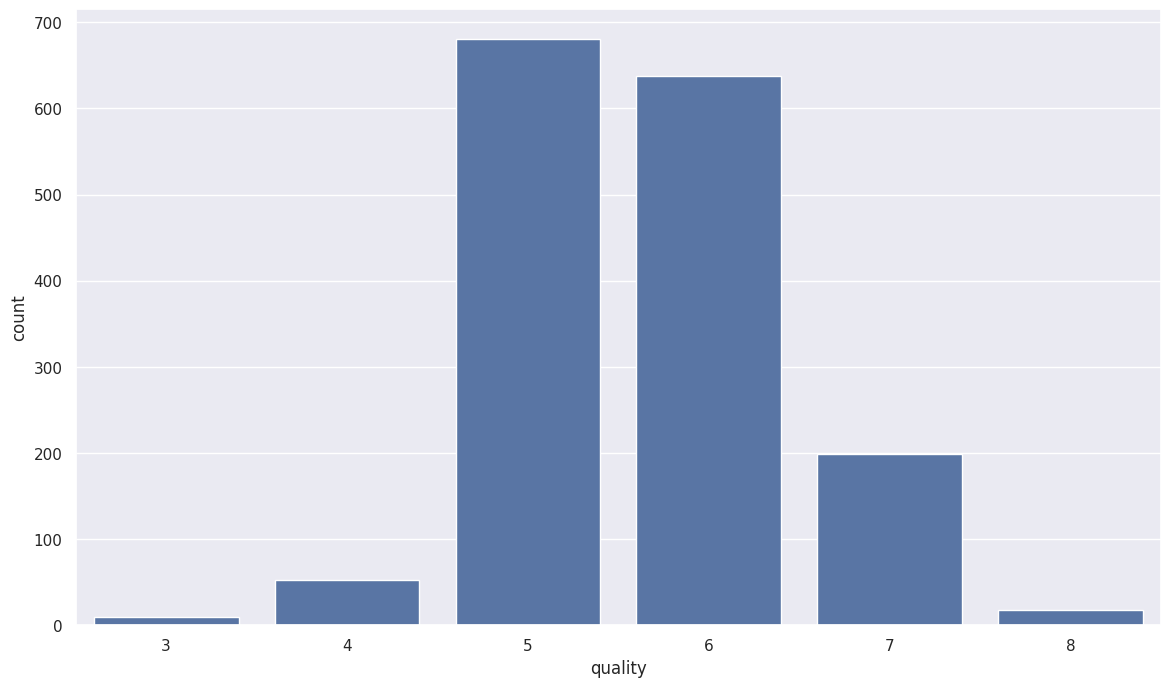

In [102]:
#To check the correalated columns
#Let's first start with the quality column:

import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
#sns.countplot(df_red["quality"])
sns.countplot(x='quality', data=df_red)


#
from the graph we can see that the red wine with best quality at level 8 is lower in number.while the second best quality at 7th have 200 count,where the number of red wine is higher in count at level 6 and 5.

## Corelation analysis of red_wine

In [103]:
# to find the corelation between the columns in the wine database
sns.pairplot(df_red)
#

Error in callback <function flush_figures at 0x7d68645af010> (for post_execute):


KeyboardInterrupt: 

positive correlation - between fixed acidity and density.
negative correlation - between  acidity with pH,alcohol percentage and density.

<Axes: >

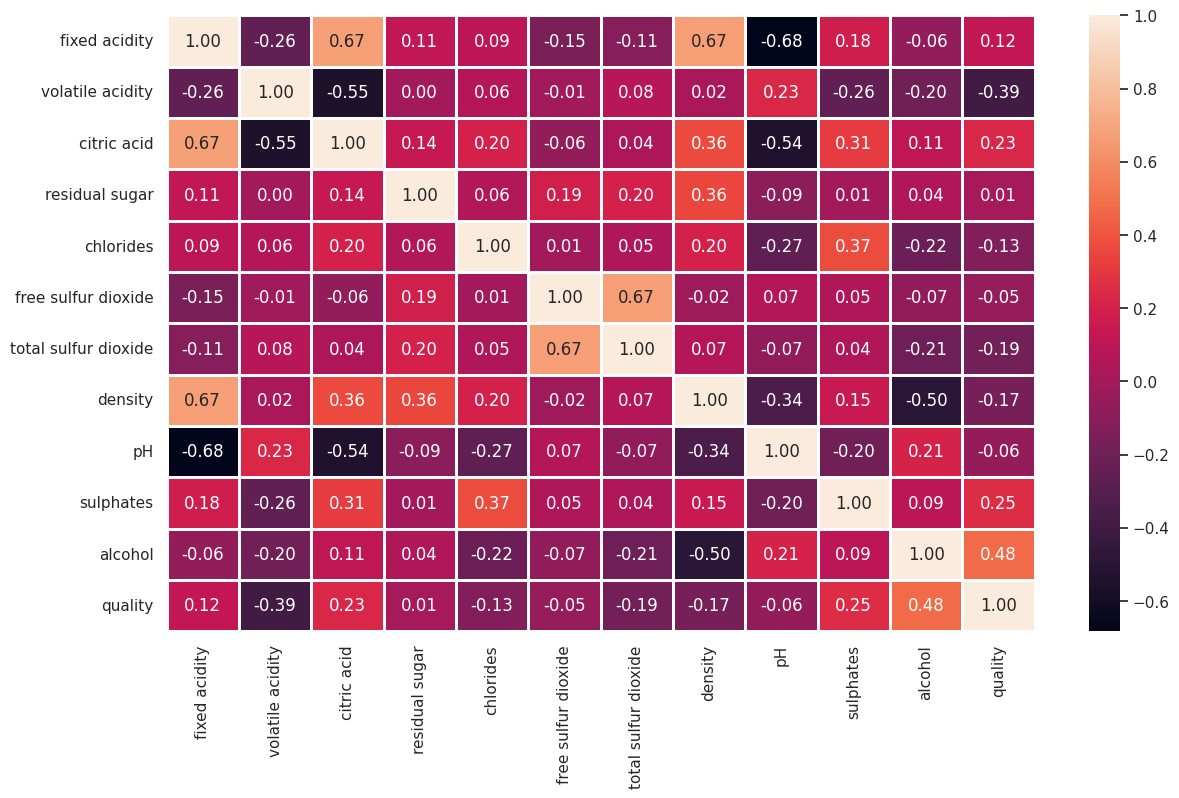

In [104]:
# heatmap
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2)



*   Alcohol is positively correlated with the quality of the red wine.
*   Alcohol has a weak positive correlation with the pH value.

*   Citric acid and density have a strong positive correlation with fixed acidity.
*   pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.




<ipython-input-105-25fcd2d8cdd5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_red['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

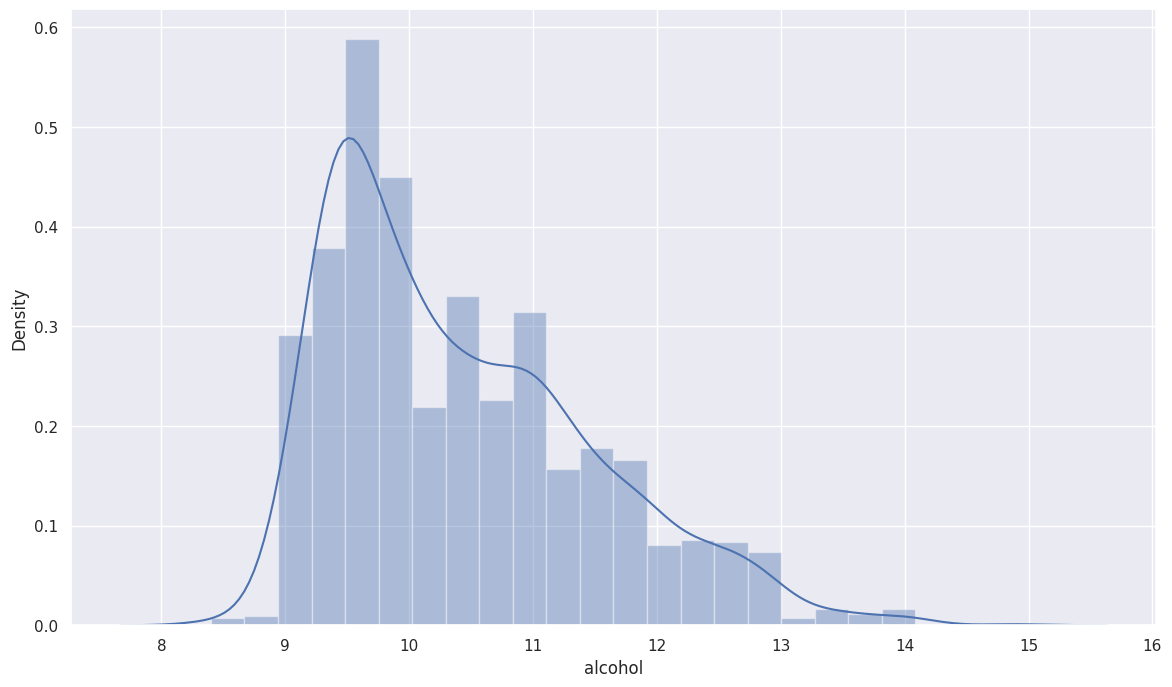

In [105]:
# To identify the alcohol concentration is distributed with respect to the quality of the red wine
sns.distplot(df_red['alcohol'])

we can see that alcohol distribution is positively skewed with the quality of the red wine.

In [106]:
# We can verify this using the skew method from scipy.stats. Check the snippet given here:
from scipy.stats import skew
skew(df_red['alcohol'])

0.8600210646566755

The output verifies that alcohol is positively skewed. That gives deeper insight into the alcohol column.

## Alcohol verses quality
Let's find out  how the quality of wine varies with respect to alcohol concentration.

<Axes: xlabel='quality', ylabel='alcohol'>

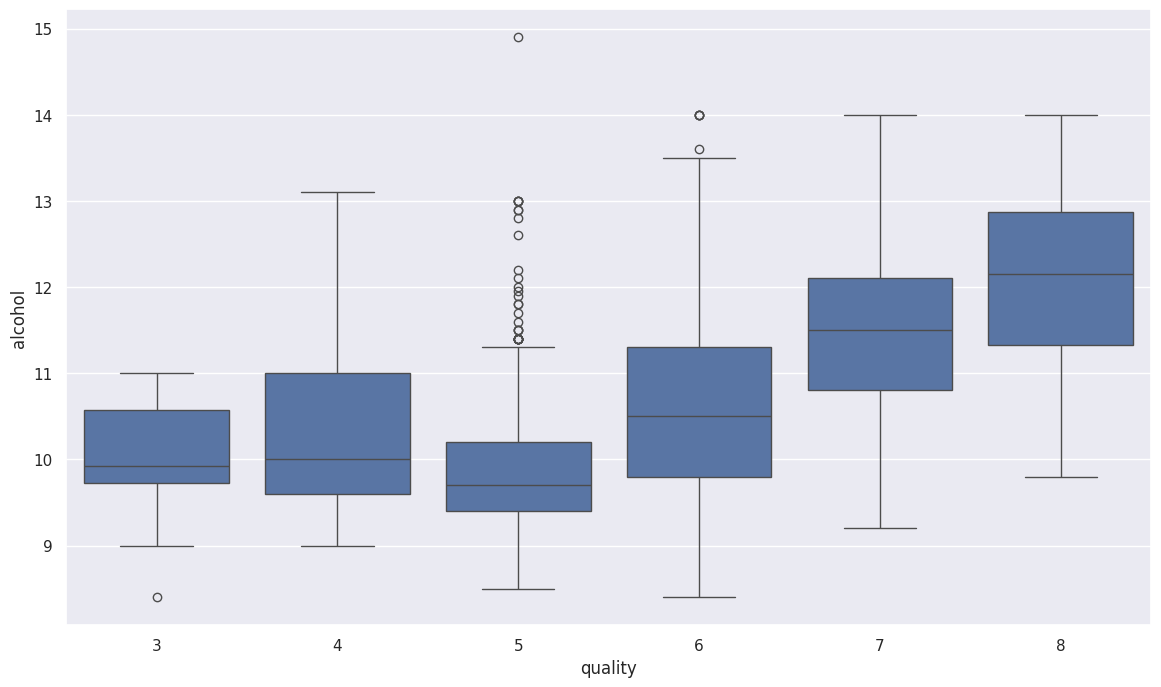

In [107]:
sns.boxplot(x='quality', y='alcohol', data = df_red)

Most of the outliers as shown in  are around wine with quality 5 and 6. We can remove the outliers by passing an argument, showoutliers=False, as shown in the following code:

<Axes: xlabel='quality', ylabel='alcohol'>

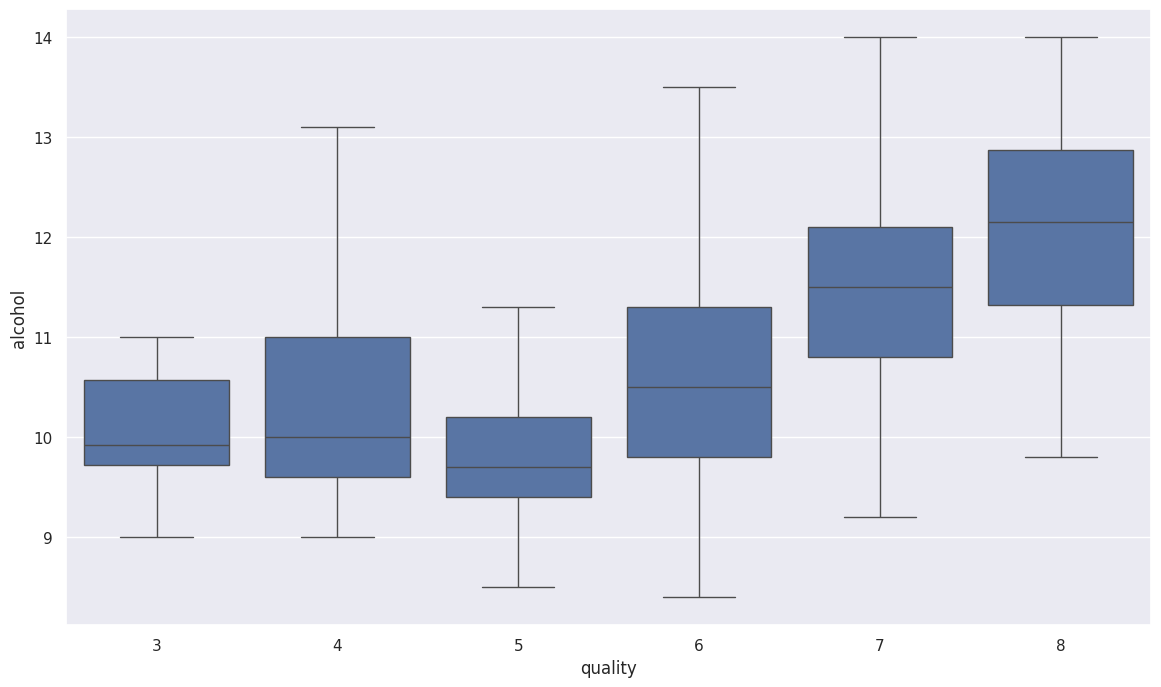

In [108]:
sns.boxplot(x='quality', y='alcohol', data = df_red, showfliers=False)

it seems that as the quality of wine increases, so does the alcohol concentration.
The higher the alcohol concentration is, the higher the quality of the wine.

## Alcohol verses pH
let's find see the correlation between the alcohol column and pH values.

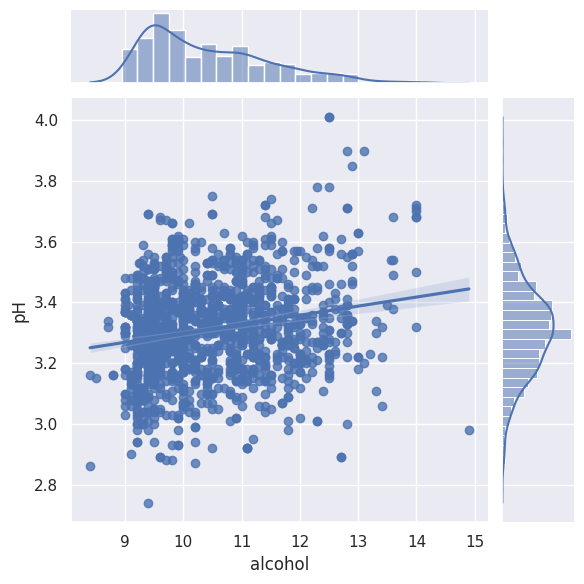

In [109]:
sns.jointplot(x='alcohol',y='pH',data=df_red, kind='reg')

that alcohol is weakly positively related to the pH values. Moreover, the regression line is depicted in the screenshot, illustrating the correlation between them.

In [110]:
#We can quantify the correlation using Pearson regression from scipy.stats, as shown here:
from scipy.stats import pearsonr

def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))

In [111]:
#we can use the preceding method to see the correlation between any two columns. Let's see the correlation between alcohol and pH:
get_correlation('alcohol','pH', df_red)

Correlation between alcohol and pH is 0.20563250850549825
P-value of this correlation is 9.964497741458062e-17


##Analyzing white wine

## Red wine versus white wine

we can try to find the average quality of each wine

In [112]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


Adding a new attribute

Let's create a new attribute(column), wine_category, to both dataframes.



In [113]:
df_white['wine_category'] = 'white'
df_red['wine_category'] = 'red'

Next, let's see what are the unique values of the column quality in both types of wines:

In [114]:
print('RED WINE: List of "quality"', sorted(df_red['quality'].unique()))
print('WHITE WINE: List of "quality"', sorted(df_white['quality'].unique()))

RED WINE: List of "quality" [3, 4, 5, 6, 7, 8]
WHITE WINE: List of "quality" [3, 4, 5, 6, 7, 8, 9]


Note that both the red and the white wines have the same unique values for the quality column.

##Converting into a categorical column
Although the quality column is numerical, here, we are interested in taking quality as the class.
To make it clear, let's convert numerical values into categorical values in this subsection.

To do so, we need a set of rules. Let's define a set of rules:

quality_label = low  if value <= 5
quality_label = medium  if 5 < value <= 7
quality_label = high  if value > 7


That sounds doable, right? Of course, it is. Let's check the code, given as follows:

In [115]:
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

df_white['quality_label'] = df_white['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

In [116]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [117]:
#Let's count the number of values in each category of wine:
print(df_white['quality_label'].value_counts())
df_red['quality_label'].value_counts()

quality_label
medium    3078
low       1640
high       180
Name: count, dtype: int64


quality_label
medium    837
low       744
high       18
Name: count, dtype: int64

 that most of the wines are of medium quality in both cases.

# Concatenating dataframes

Let's perform a combined exploration of both types of dataframes.

In [118]:
df_wines = pd.concat([df_red, df_white])

### Sampling the datasets


In [119]:
#Let's also re-shuffle the rows so that it randomizes the data points:
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)

Note that the drop=True argument resets the indexes to the default integer index.
Next, we would like to check the first few columns to see whether all of the rows are correctly merged:

In [120]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


##Grouping columns

We have already discussed several ways in which we can group columns and rows using the pandas dataframe

1.Let's use the combined dataframe and group them using the columns, alcohol, density, pH, and quality.
2.Next, we can apply the pd.describe() method to get the most frequently used descriptive statistics:

In [121]:
subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_wines[df_wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_wines[df_wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_wines[df_wines['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1,
          keys=[' Low Quality Wine',
                ' Medium Quality Wine',
                ' High Quality Wine'])

Low Quality Wine                             Medium Quality Wine  \
                alcohol  density       pH  quality              alcohol   
count           2384.00  2384.00  2384.00  2384.00              3915.00   
mean               9.87     1.00     3.21     4.88                10.81   
std                0.84     0.00     0.16     0.36                 1.20   
min                8.00     0.99     2.74     3.00                 8.40   
25%                9.30     0.99     3.11     5.00                 9.80   
50%                9.60     1.00     3.20     5.00                10.80   
75%               10.40     1.00     3.31     5.00                11.70   
max               14.90     1.00     3.90     5.00                14.20   

                                  High Quality Wine                          
       density       pH  quality            alcohol density      pH quality  
count  3915.00  3915.00  3915.00             198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28              11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45               1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00               8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00              11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00              12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00              12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00              14.00    1.00    3.72    9.00

In the preceding code snippet, first, we created a subset of attributes that we are interested in. Then, we created three different dataframes for low-quality wine, medium-quality wine, and high-quality wine. Finally, we concatenated them. The output of the preceding code is given here:

we have grouped the dataset into three distinct groups: low-quality wine, medium-quality wine, and high-quality wine. Each group shows three different attributes: alcohol, density, and pH value. Using the concatenation method to group the columns based on certain conditions can be very handy during the data analysis phase.

In the next section, we are going to discuss the univariate analysis for the wine quality dataset.

##Univariate analysis



The simplest way to visualize the numeric data and their distribution is by using a histogram.

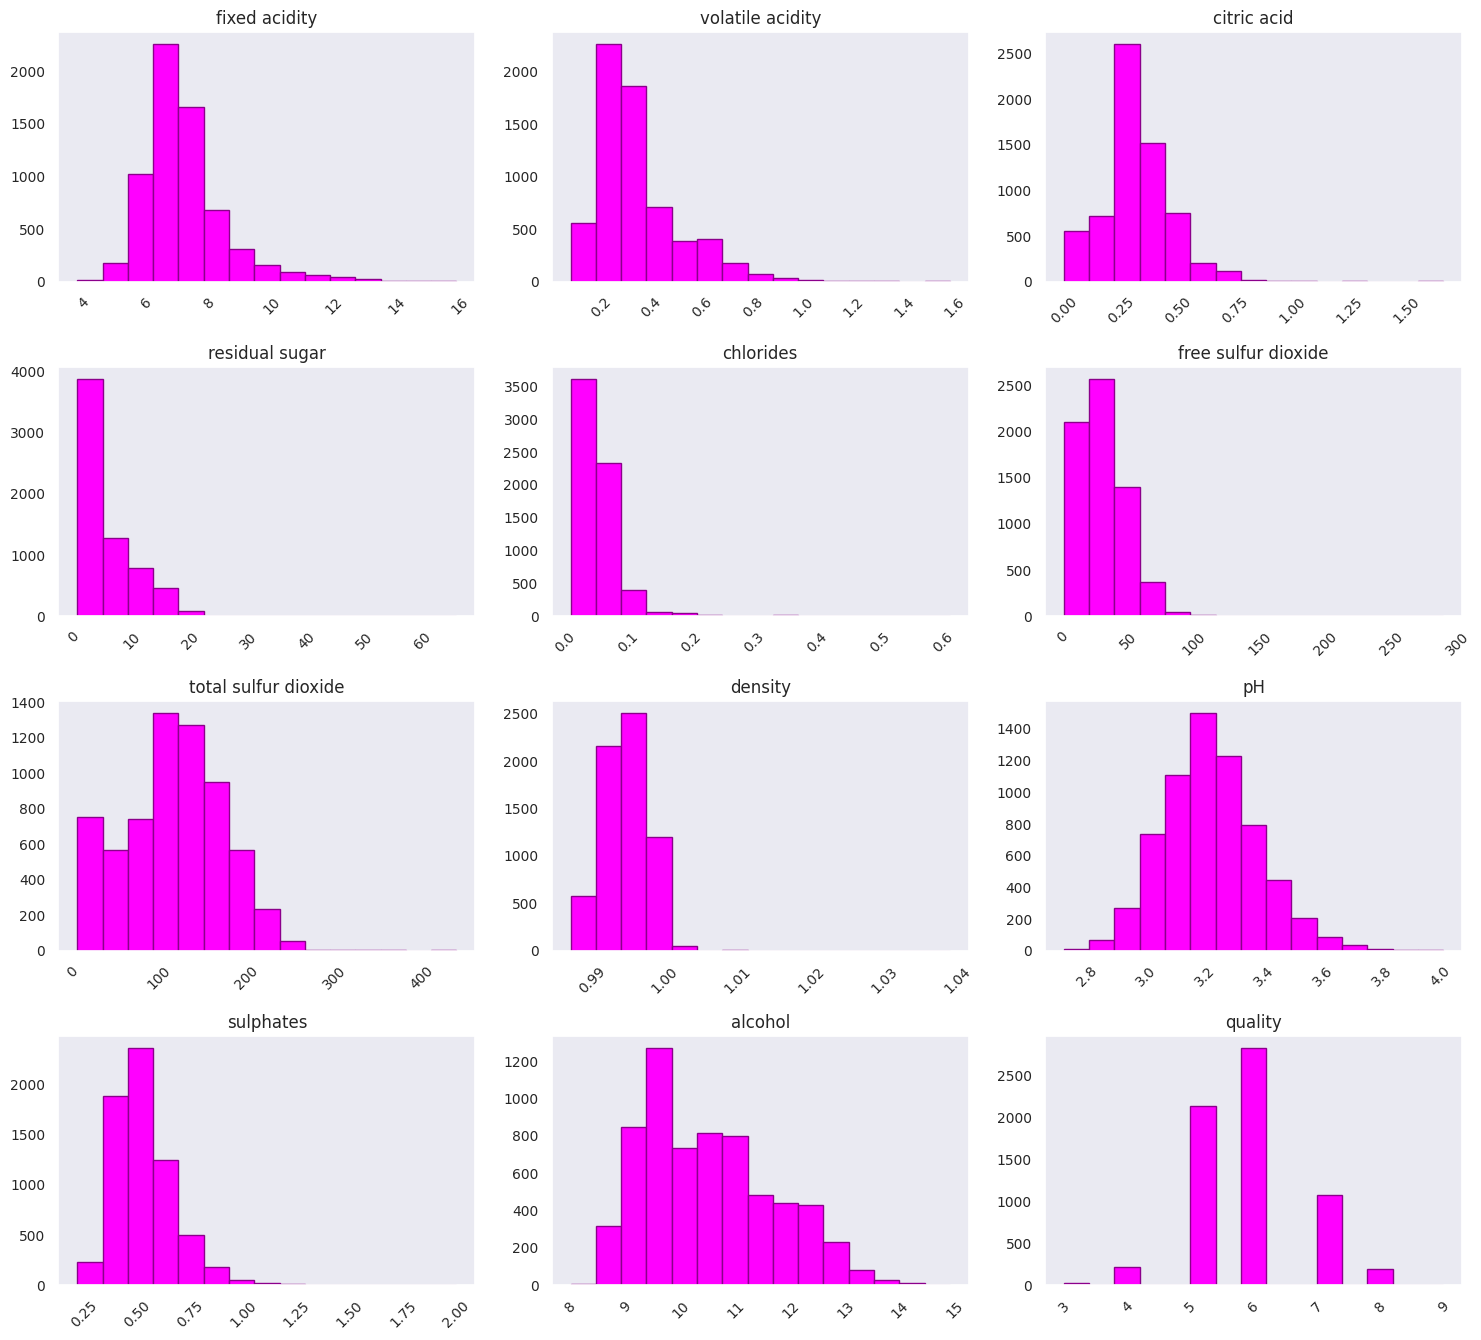

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = df_wines.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.show()

##Multivariate analysis on the combined dataframe

Let's perform the multivariate analysis with the combined dataset.

In [127]:
#df_wines.head
# df_wines_labels = df_wines.drop([ 'quality_label'], axis=1)
df_wines_labels = df_wines.drop(columns=['wine_category', 'quality_label'])
#df_wines.head()
#df_wines = df_wines.drop(columns=['wine_category', 'quality_label'])
#df_wines.head()

In [128]:
df_wines_labels

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


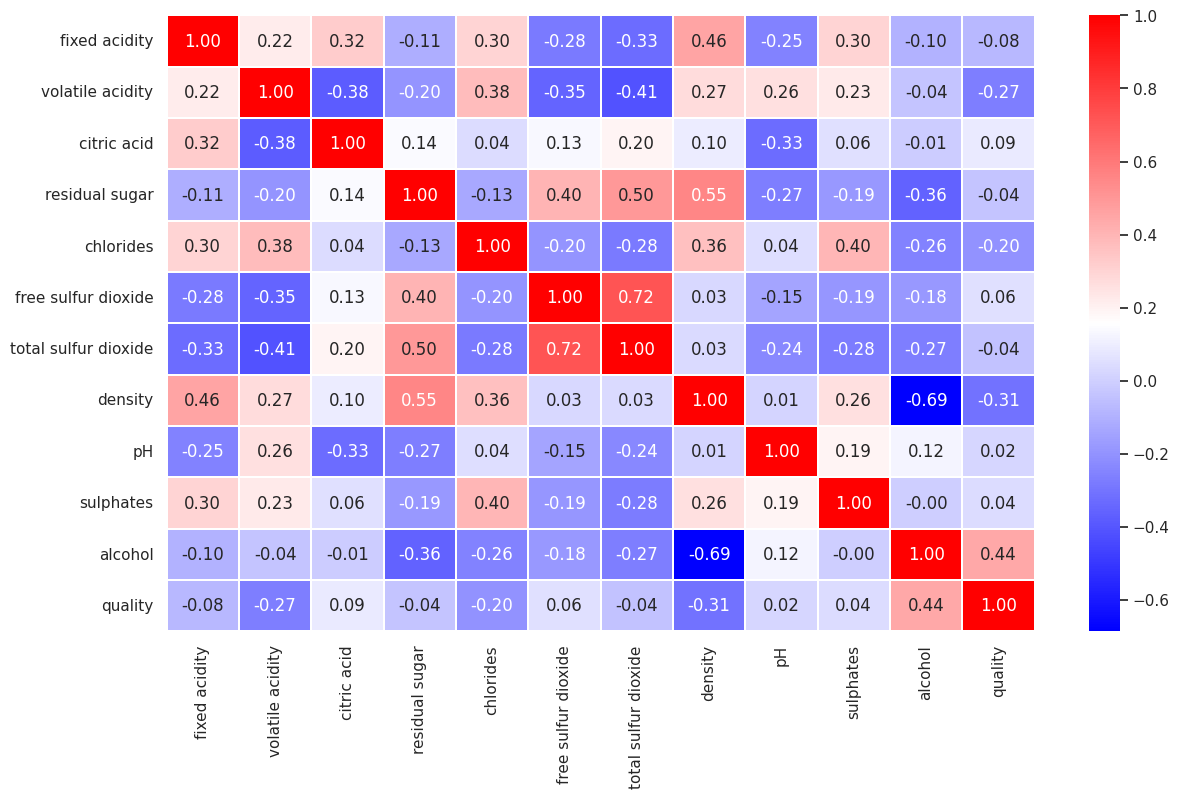

In [129]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

hm = sns.heatmap(df_wines_labels.corr(),
                ax=ax,
                 cmap="bwr",
                 annot=True,
                 fmt='.2f',
                 linewidths=.05)
#fig.subplots_adjust(top=0.93)
#fig.suptitle('Combined Wine Attributes and their Correlation Heatmap', fontsize=14, fontweight='bold')

## Discrete categorical attributes

We have one discrete categorical column in our dataframe, wine_category.



<Axes: xlabel='quality', ylabel='count'>

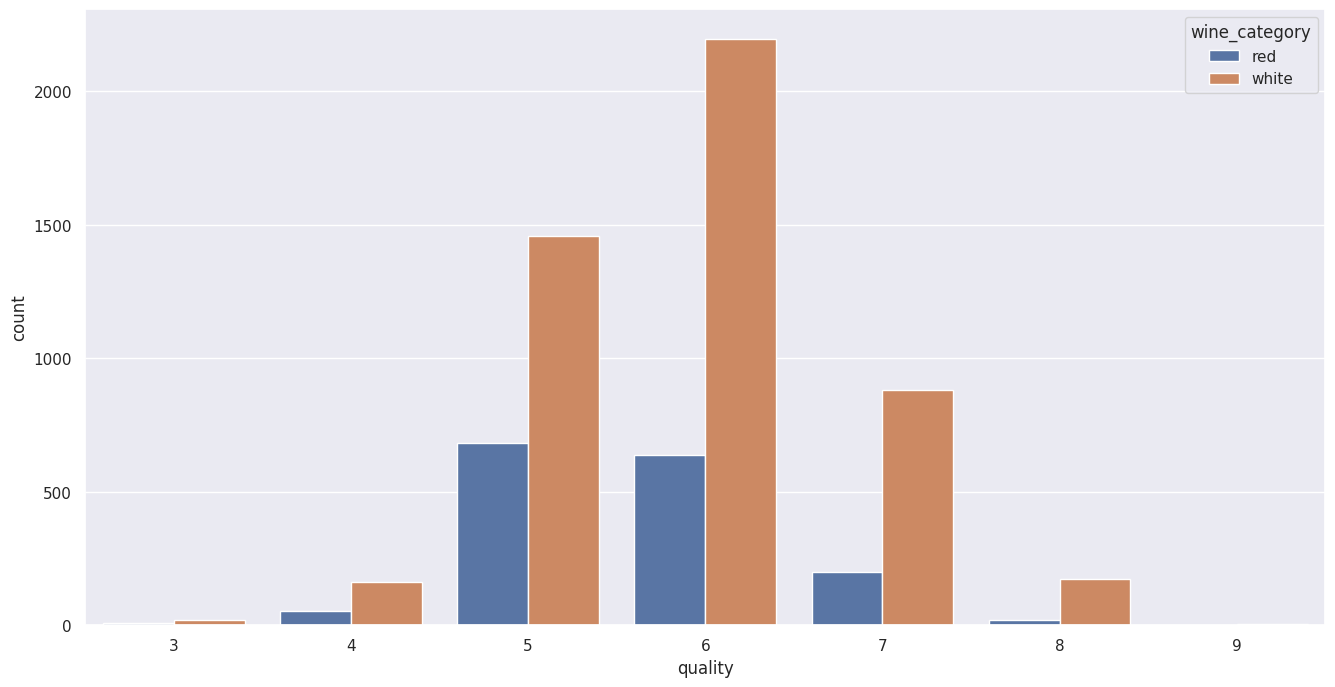

In [131]:
fig = plt.figure(figsize=(16, 8))

sns.countplot(data=df_wines, x="quality", hue="wine_category")

shows different categories of wine [3, 4, 5, 6, 7, 8, 9] and their frequency distributions over a nice count plot. It is a clearer illustration for end stakeholders.

## 3-D visualizations

Text(0.5, 0, 'Total sulfur dioxide')

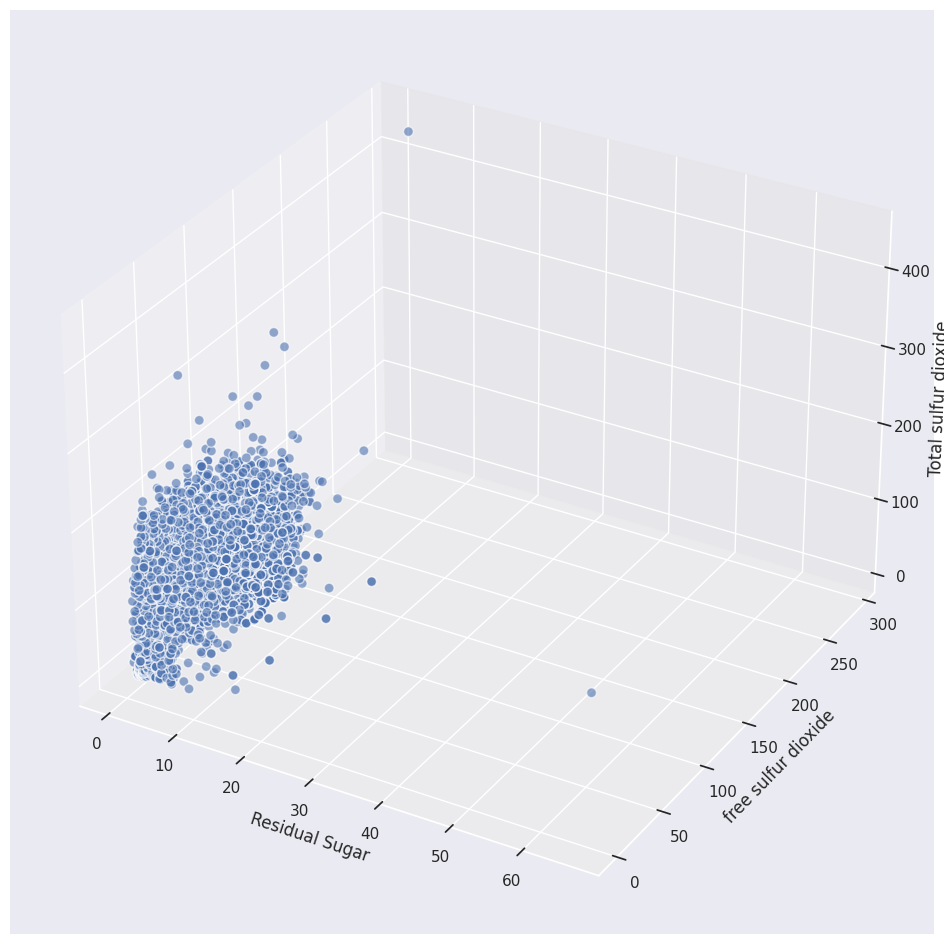

In [132]:
#Let's start first by creating the axes:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
#add the columns to the axes:
xscale = df_wines['residual sugar']
yscale = df_wines['free sulfur dioxide']
zscale = df_wines['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')
#we are interested in looking into the residual sugar, free sulfur dioxide, and total sulfur dioxide columns.
 #let's add the labels to all of the axes
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')


In [ ]:
#add the columns to the axes:
#xscale = df_wines['residual sugar']
#yscale = df_wines['free sulfur dioxide']
#zscale = df_wines['total sulfur dioxide']
#ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

In [133]:
#we are interested in looking into the residual sugar, free sulfur dioxide, and total sulfur dioxide columns.
 #let's add the labels to all of the axes
#ax.set_xlabel('Residual Sugar')
#ax.set_ylabel('free sulfur dioxide')
#ax.set_zlabel('Total sulfur dioxide')

plt.show()



 It shows that three variables show a positive correlation with respect to one another

Text(0.5, 1.05, 'Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide')

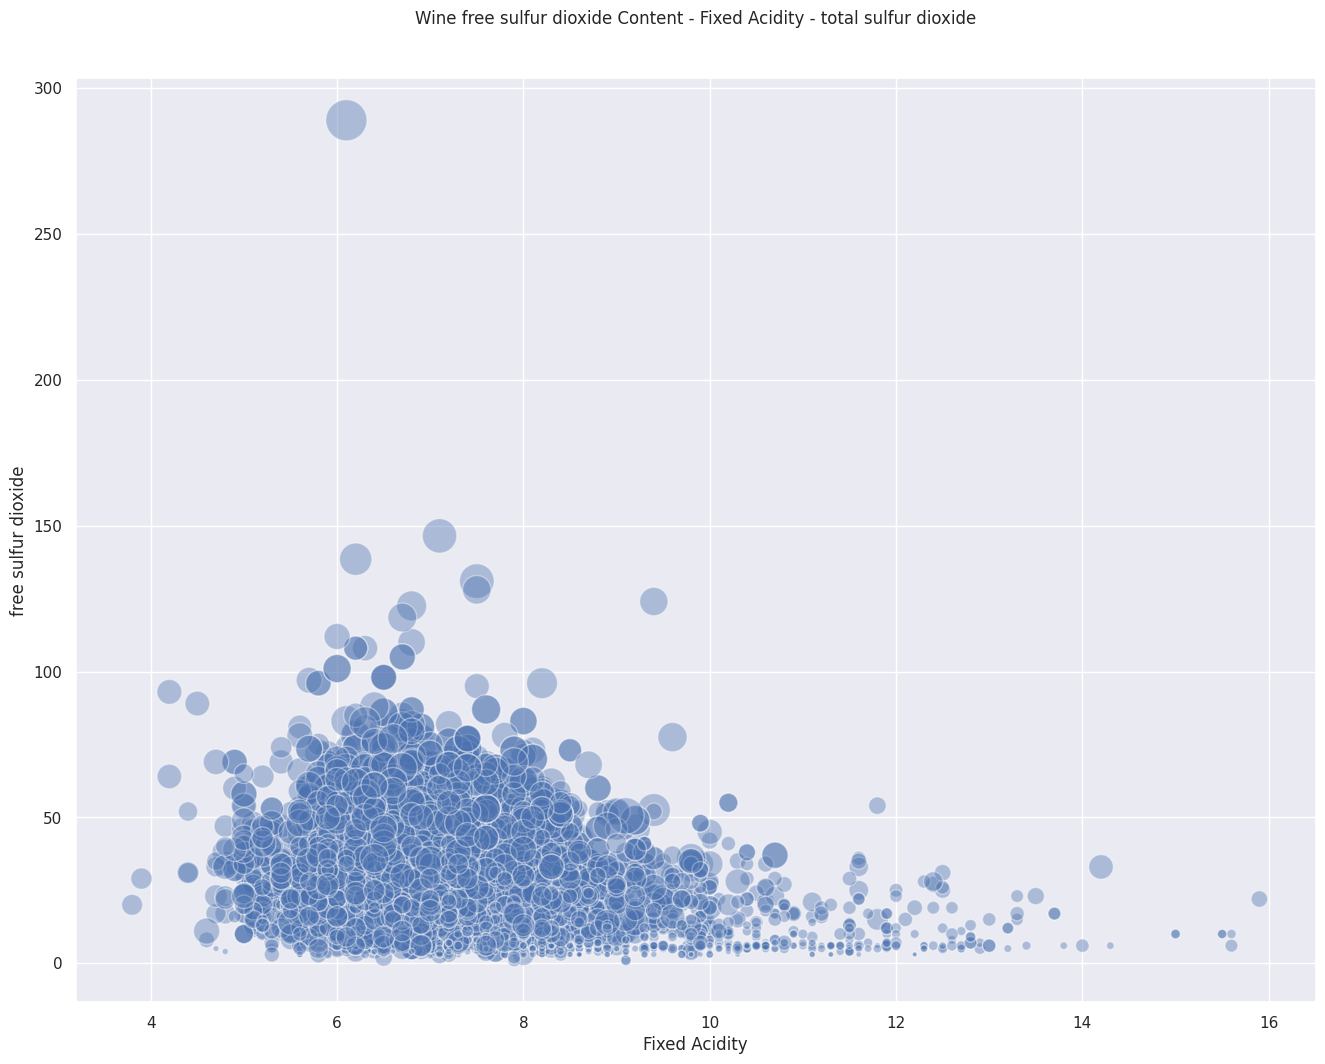

In [134]:
fig = plt.figure(figsize=(16, 12))

plt.scatter(x = df_wines['fixed acidity'],
            y = df_wines['free sulfur dioxide'],
            s = df_wines['total sulfur dioxide'] * 2,
            alpha=0.4,
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)

we have used the s parameter to denote the third variable (total sulfur dioxide).

the size of the circles denotes the third variable. In this case, the larger the radius of the circle is, the higher the value of residual sugar.

you will notice most of the higher circles are located between the x axis with values of 4 and 10 and with the y axis with values between 25 and 150.

## Model development and evaluation

In [135]:
# import the required libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

we are going to encode the categorical values for the quality_label column. We will encode the values so that all of the low values will be changed to 0, the medium values will be changed to 1, and the high values will be changed to 2.

In [136]:
label_encoder = LabelEncoder()

df_wines['quality_label'] = label_encoder.fit_transform(df_wines['quality_label'])

let's split our dataset into a training set and test set. We will use 70% of the dataset as the training set and the remaining 30% as the test set:

In [140]:
X = df_wines.drop(['quality','wine_category', 'quality_label'],axis=1)
y = df_wines['quality']

### Split Dataset

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X , y ,test_size=0.30,random_state=42)

### Train Models

In [143]:
# List of ML algorithms for Training
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

# Names of ML Algorithm for training
model_names=['LogisticRegression','LinearSVM','rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier', 'GaussianNB']

In [146]:
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_algorithim = models[model] # choose the ML algotithm from the List

    print("Training ML Algorithm "+model_names[model])

    #Training ML model
    classification_model = classification_algorithim.fit(x_train,y_train)
    ml_model = classification_model.fit(x_train,y_train)

    #Testing ML model
    pred = ml_model.predict(x_test)

    # Calculate Accuracy _score
    acc.append(accuracy_score(pred,y_test))

eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

Training ML Algorithm LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training ML Algorithm LinearSVM


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training ML Algorithm rbfSVM
Training ML Algorithm KNearestNeighbors
Training ML Algorithm RandomForestClassifier
Training ML Algorithm DecisionTree
Training ML Algorithm GradientBoostingClassifier
Training ML Algorithm GaussianNB


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.48923076923076925,
  0.3548717948717949,
  0.4502564102564103,
  0.4948717948717949,
  0.6707692307692308,
  0.5928205128205128,
  0.6051282051282051,
  0.4687179487179487]}

In [147]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,RandomForestClassifier,0.670769
6,GradientBoostingClassifier,0.605128
5,DecisionTree,0.592821
3,KNearestNeighbors,0.494872
0,LogisticRegression,0.489231
7,GaussianNB,0.468718
2,rbfSVM,0.450256
1,LinearSVM,0.354872


<Axes: xlabel='Accuracy', ylabel='Modelling Algorithm'>

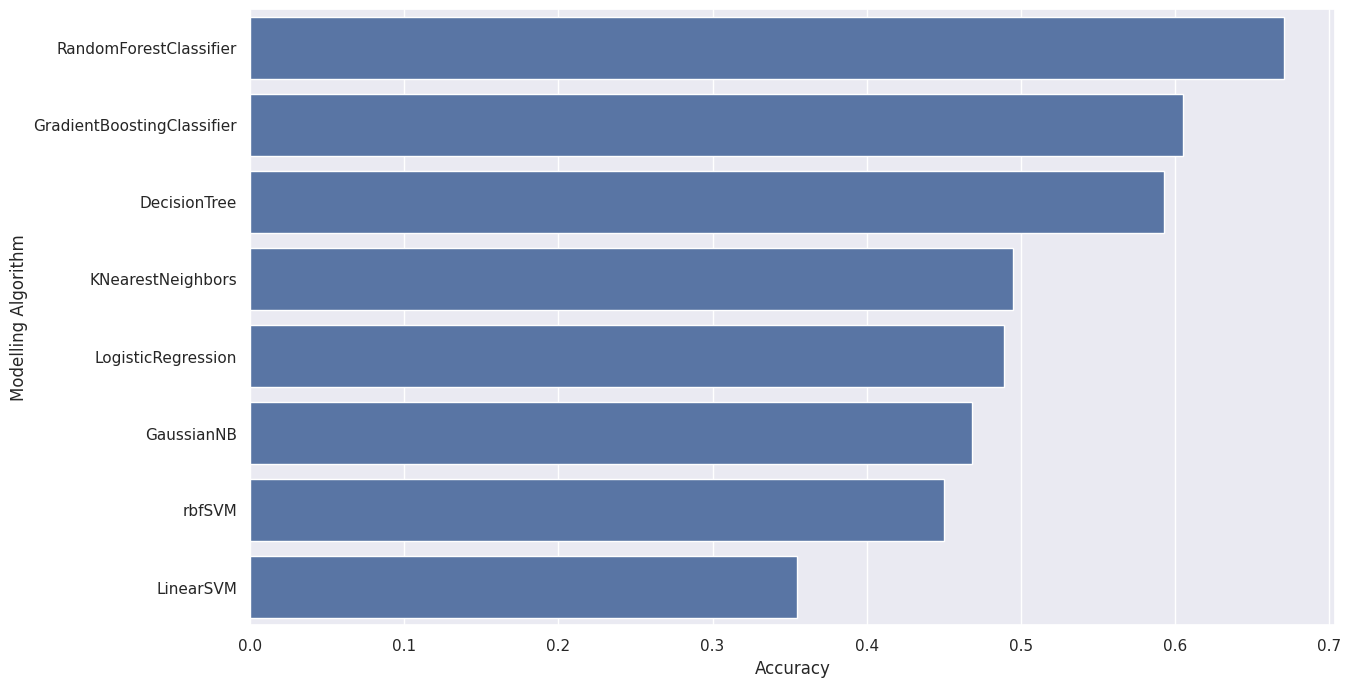

In [148]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

Summary :
Tree based ML Algorithms have better accuracy than other ML Algorithms. Lets apply Hyperpermeter Tunning on RandomForestClassifer algorithms

# HyperPerameter Tunning

Try Different ML Models and choose the best

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier()

X = df_wines.drop(['quality','wine_category', 'quality_label'],axis=1)
y = df_wines['quality']

# Split datasets
X_train, X_test, y_train, y_test=train_test_split(X , y, test_size=0.30, random_state=42)

# Create a pipeline with a scaler and a placeholder for the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('rf', RandomForestClassifier())  # Step 2: Random Forest classifier
])


**Hyperperameter Tunning :**

Define the parameter grid: For each model, specify the model and any hyperparameters to tune.

In [162]:
# Create a parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}



**GridSearchCV:**

Train all the models and hyperparameters specified in the parameter grid using cross-validation and select the best model.

In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Perform Grid Search with accuracy as the scoring metric
grid_search = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           cv=5, verbose=2,
                           scoring='accuracy')
# train
grid_search.fit(X, y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.6s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.6s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   1.8s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   1.9s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time= 

In [164]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best cross-validation accuracy score: 0.69
